# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, Y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape

# TODO: Number of validation examples
n_validation = X_valid.shape

# TODO: Number of testing examples.
n_test = X_test.shape

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(Y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (34799, 32, 32, 3)
Number of testing examples = (12630, 32, 32, 3)
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

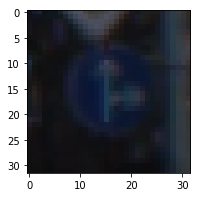

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np

image_no = 990

image = X_train[image_no].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)

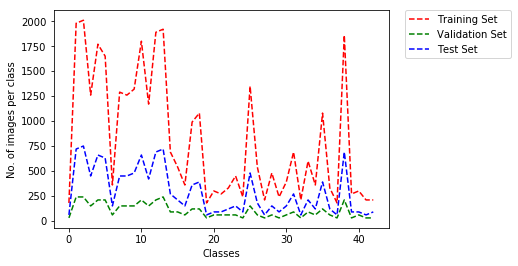

In [4]:
import collections
import matplotlib.patches as mpatches

c_train = collections.Counter(Y_train)
c_valid = collections.Counter(Y_valid)
c_test = collections.Counter(Y_test)

c_train_l = c_train.items()
c_valid_l = c_valid.items()
c_test_l = c_test.items()

train_list = [None]*43
valid_list = [None]*43
test_list = [None]*43

for elem, cnt in c_train_l:
    train_list[elem] = cnt

for elem, cnt in c_valid_l:
    valid_list[elem] = cnt

for elem, cnt in c_test_l:
    test_list[elem] = cnt
    
fig = plt.figure()

p1 = plt.plot(train_list,'r--', label = 'Training Set')
p2 = plt.plot(valid_list,'g--', label = 'Validation Set')
p3 = plt.plot(test_list,'b--', label = 'Test Set')

plt.xlabel('Classes')
plt.ylabel('No. of images per class')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('number.jpg', bbox_inches='tight')

## Example of each Class

Printing an Example of each of the 43 classes

In [5]:
indices = [-1]*43

for i,y in enumerate(Y_train):
    count = 0
    for j,index in enumerate(indices):
        if j == y and index == -1:
            indices[j] = i
        elif(j!=y):
            count += 1
    if count==43:
        break
        
print(indices)

[9960, 2220, 31439, 5370, 6810, 12360, 21450, 23730, 15870, 11040, 17130, 8580, 27329, 21810, 29219, 29909, 5010, 30449, 20370, 6630, 25950, 25680, 4500, 1770, 10800, 33449, 1230, 10350, 26849, 10560, 25020, 210, 10140, 26250, 20010, 18930, 900, 4830, 14010, 25410, 4200, 0, 9750]


In [6]:
import pandas as pd

SignNames = pd.read_csv('./signnames.csv')
SignNames.head

<bound method NDFrame.head of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14              

43 Classes

D:\Installs\Conda\envs\tg\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


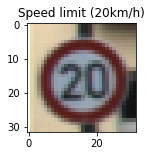

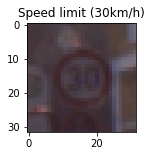

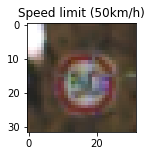

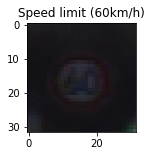

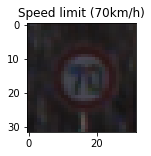

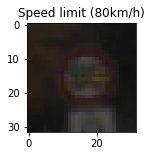

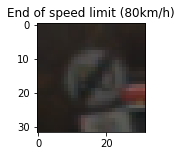

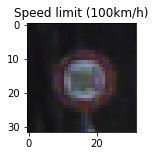

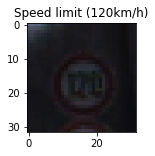

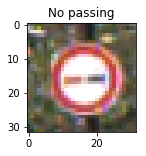

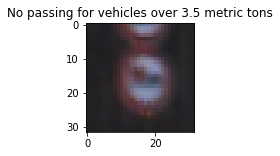

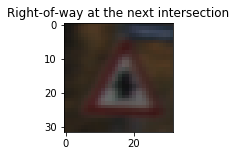

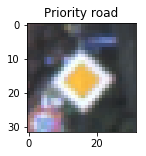

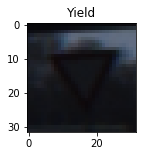

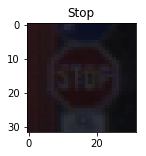

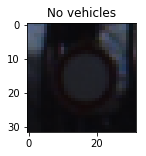

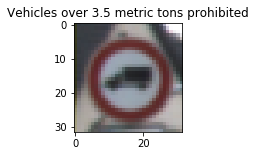

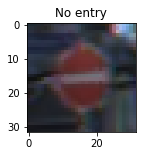

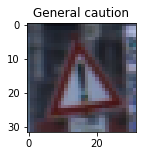

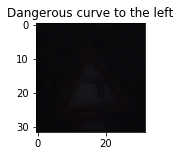

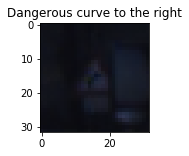

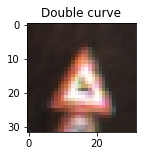

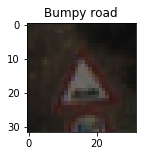

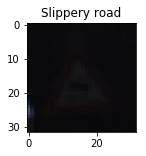

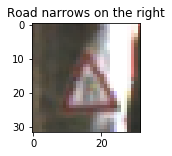

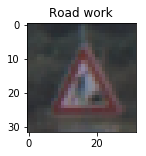

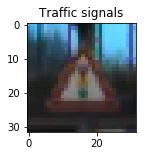

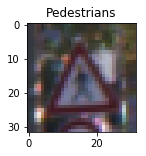

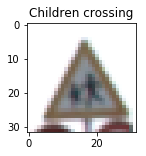

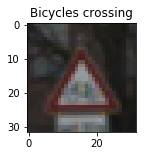

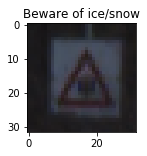

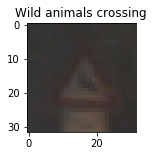

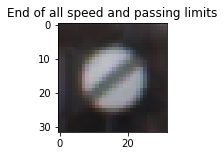

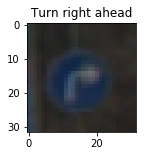

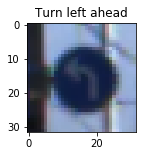

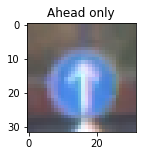

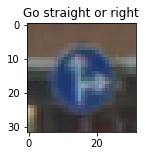

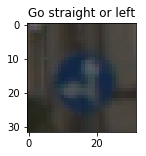

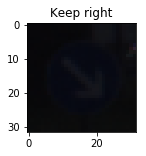

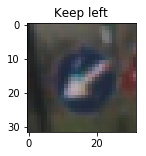

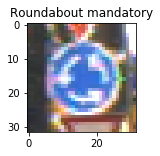

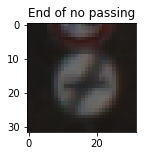

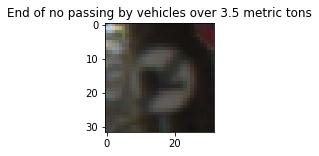

In [7]:
for index in indices:
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[index])
    plt.title(SignNames.iloc[Y_train[index]][0])
    plt.title(SignNames.iloc[Y_train[index]][1])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import numpy as np

In [9]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train)

## Randomly Scale, Rotate and Translate the image.

### Rotating the image

In [10]:
import scipy.ndimage as sp
from skimage.color import rgb2gray
from random import randint
import cv2

cols = X_train.shape[1]
rows = X_train.shape[2]
X_train_rotate = np.empty(X_train.shape, dtype=np.uint8)

for index,image in enumerate(X_train):
    angle_to_rotate = randint(-5,5)
    X_train_rotate[index] = sp.rotate(image, angle_to_rotate, reshape=False)
    

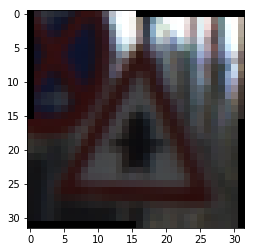

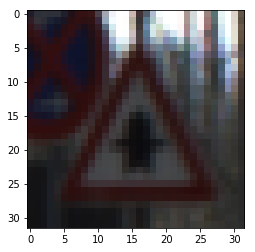

In [11]:
fig = plt.figure()
plt.imshow(X_train_rotate[998])
fig.savefig('Rotated.jpg', bbox_inches='tight')
#print(np.amax(X_train_rotate))
#print(np.amin(X_train_rotate))
#print(np.amax(X_train))
#print(np.amin(X_train))
fig = plt.figure()
plt.imshow(X_train[998])
fig.savefig('Original.jpg', bbox_inches='tight')

### Applying CLAHE transform to the image

In [12]:
from sklearn import preprocessing

def clahe_transform(X_batch):
    output_c = np.empty(X_batch.shape)
    #https://stackoverflow.com/questions/24341114/simple-illumination-correction-in-images-opencv-c/24341809#24341809

    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
    
    if len(X_batch.shape) == 3:
        image = X_batch
        image = image.astype(np.uint8)
        lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        transform = clahe.apply(l)
        temp = cv2.merge((transform,a,b))
        output_c = cv2.cvtColor(temp, cv2.COLOR_LAB2RGB)
    else:
        for index,image in enumerate(X_batch):
            image = image.astype(np.uint8)
            lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)
            transform = clahe.apply(l)
            temp = cv2.merge((transform,a,b))
            output_c[index] = cv2.cvtColor(temp, cv2.COLOR_LAB2RGB)

    return output_c

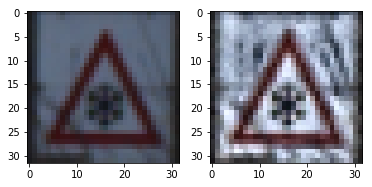

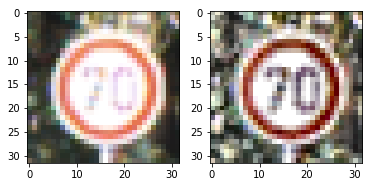

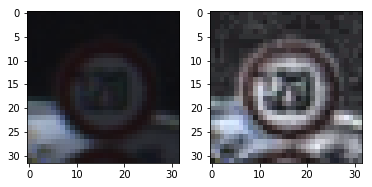

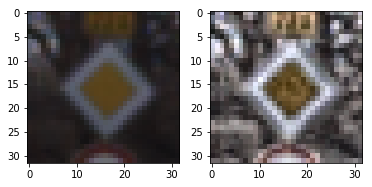

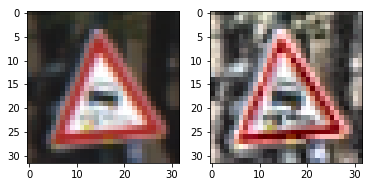

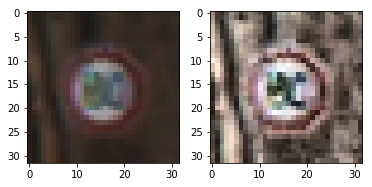

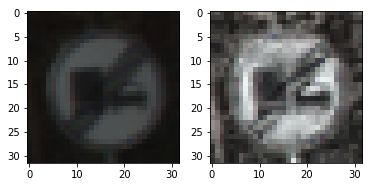

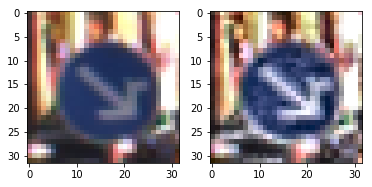

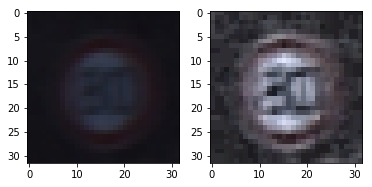

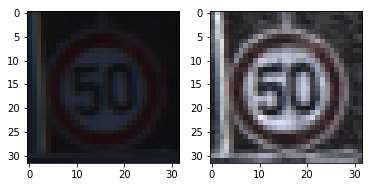

In [13]:
from random import randint

for i in range(10):
    #34799 -> Total no. of images in the training set.
    random_integer = randint(0, 34799)
    fig, axarr = plt.subplots(1,2)
    axarr[0].imshow(X_train[random_integer])
    axarr[1].imshow(clahe_transform(X_train[random_integer]))

    #plt.figure(figsize=(2,2))
    #plt.imshow(X_train[random_integer])
    #plt.figure(figsize=(2,2))
    #plt.imshow(clahe_transform(X_train[random_integer]))
    fig.savefig('./Processed_Images_Eg/Image_'+str(i)+'.jpg', bbox_inches='tight')

In [14]:
X_train_final = X_train_rotate #The batch to be fed after pre-processing

# Model Architecture

## Hyperparameters
Set the Hyperparameters of the model here.

In [15]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

rate = 0.0002
epochs = 55
batch_size = 128
keep_probability = 0.5

In [16]:
def Conv_net(images):   

    #1st Layer
    conv1 = tf.layers.conv2d(images, 16, 5, strides=1, padding='SAME',
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), name='conv1') 
    conv1 = tf.contrib.layers.batch_norm(conv1,is_training=is_training)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    
    #2nd Layer
    conv2 = tf.layers.conv2d(conv1, 32, 3, strides=1, padding='SAME',
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), name='conv2') 
    conv2 = tf.contrib.layers.batch_norm(conv2,is_training=is_training)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    
    #3rd Layer
    conv3 = tf.layers.conv2d(conv2, 64, 3, strides=1, padding='SAME',
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), name='conv3') 
    conv3 = tf.contrib.layers.batch_norm(conv3,is_training=is_training)
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    
    #print(conv1.get_shape())
    
    flat_images = tf.reshape(conv3, (-1, 1024))
    nn = tf.layers.dense(flat_images, 400)
    nn = tf.nn.dropout(nn,keep_prob)
    nn = tf.layers.dense(nn, 120)
    nn = tf.nn.dropout(nn,keep_prob)
    nn = tf.layers.dense(nn, 84)
    nn = tf.nn.dropout(nn,keep_prob)
    logits = tf.layers.dense(nn, 43)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Build the Neural Network

In [17]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32,(None, 32, 32, 3))
y = tf.placeholder(tf.int32,(None))
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)
oneHot = tf.one_hot(y,43)

logits = Conv_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHot, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

#http://ruishu.io/2016/12/27/batchnorm/
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# For prediction of new images as the new images are fed one by one.
correct_pred_final = tf.equal(tf.cast(tf.argmax(logits, 1), tf.int32), tf.cast(tf.argmax(oneHot, 0), tf.int32))
accuracy_final = tf.reduce_mean(tf.cast(correct_pred_final, tf.float32))

# Top 5 Softmax Probabilities
top_five = tf.nn.top_k(tf.nn.softmax(logits), k=5)

saver = tf.train.Saver()

In [18]:
def Valid(session, epoch):
    size = len(X_valid)
    total_valid_acc = 0
    for start in range(0, size, batch_size):
        end = start + batch_size
        batch_x, batch_y = clahe_transform(X_valid[start:end]), Y_valid[start:end]
        valid_acc = session.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        total_valid_acc += (valid_acc * len(batch_x))
    
    acc = total_valid_acc/size
    print('Epoch {}'.format(epoch + 1), 'Validation Accuracy {}'.format(acc))
    pass

## Train the Network

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    size = len(X_train_final)
    print("Training Started:")
    print()
    for epoch in range(epochs):
        for start in range(0,size, batch_size):
            end = start + batch_size
            batch_x, batch_y = clahe_transform(X_train_final[start:end]), Y_train[start:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:keep_probability, is_training:True})
        
        Valid(sess, epoch)

    saver.save(sess, './lenet')
    print("Model saved")

Training Started:

Epoch 1 Validation Accuracy 0.1655328798185941
Epoch 2 Validation Accuracy 0.3920634920297026
Epoch 3 Validation Accuracy 0.5816326530341929
Epoch 4 Validation Accuracy 0.6530612246519855
Epoch 5 Validation Accuracy 0.8106575965070401
Epoch 6 Validation Accuracy 0.828344670228677
Epoch 7 Validation Accuracy 0.8689342406331276
Epoch 8 Validation Accuracy 0.9038548755537625
Epoch 9 Validation Accuracy 0.9206349206349206
Epoch 10 Validation Accuracy 0.9183673467225228
Epoch 11 Validation Accuracy 0.9408163265306122
Epoch 12 Validation Accuracy 0.9306122448979591
Epoch 13 Validation Accuracy 0.9514739231728102
Epoch 14 Validation Accuracy 0.9560090702947845
Epoch 15 Validation Accuracy 0.9551020408163265
Epoch 16 Validation Accuracy 0.9564625850340136
Epoch 17 Validation Accuracy 0.9485260773678215
Epoch 18 Validation Accuracy 0.9614512471655329
Epoch 19 Validation Accuracy 0.9675736961451247
Epoch 20 Validation Accuracy 0.9573696145124716
Epoch 21 Validation Accuracy 0.

## Test the Network

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    size = len(X_test)
    total_test_acc = 0
    for start in range(0, size, batch_size):
        end = start + batch_size
        batch_x, batch_y = clahe_transform(X_test[start:end]), Y_test[start:end]
        test_acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        total_test_acc += (test_acc * len(batch_x))
    
    acc = total_test_acc/size
    print("Test Accuracy = {}".format(acc))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.973555027674043


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(10, 32, 32, 3)


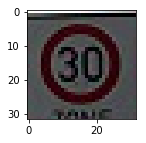

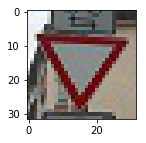

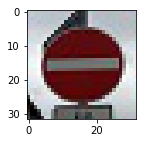

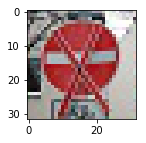

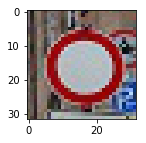

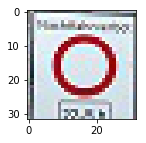

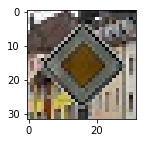

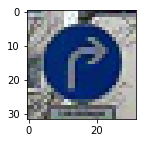

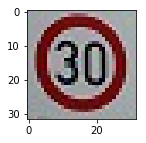

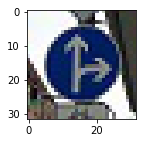

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
new_images = np.empty((10,32,32,3), dtype=np.uint8)
i=0
for img in glob.glob("D:\Desktop\CarND-Traffic-Sign-Classifier-Project\Submission\Cropped-Images\*.jpg"):
    temp = cv2.imread(img,1)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    new_images[i] = temp
    plt.figure(figsize=(2,2))
    plt.imshow(new_images[i])
    i+=1

#print(temp_images.shape)
#new_images = np.asarray(temp_images, dtype=np.uint8)
print(new_images.shape)

In [22]:
# Load the Values.csv which contains the corresponding values
SignNames = pd.read_csv('D:\Desktop\CarND-Traffic-Sign-Classifier-Project\Submission\Cropped-Images\Values.csv')
temp = SignNames.as_matrix()
Y_new_signs = np.empty(temp.shape[0], dtype=np.uint8)

for index,signs in enumerate(temp):
    Y_new_signs[index] = signs[1]

print("The correct value's of the signs:")
print(Y_new_signs)

The correct value's of the signs:
[ 1 13 17 17 15 15 12 33  1 36]


### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print("Predictions of the Signs:")
print()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print()
    size = 10
    total_test_acc = 0
    for i in range(0, size):
        batch_x, batch_y = np.reshape(clahe_transform(new_images[i]),(1,32,32,3)), Y_new_signs[i]
        test_acc = sess.run(logits, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        print("Test Predictions = {}".format(int(np.argmax(test_acc, axis=1))))
    


Predictions of the Signs:

INFO:tensorflow:Restoring parameters from .\lenet

Test Predictions = 1
Test Predictions = 13
Test Predictions = 17
Test Predictions = 17
Test Predictions = 15
Test Predictions = 15
Test Predictions = 12
Test Predictions = 33
Test Predictions = 1
Test Predictions = 36


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Comparing the predictions of the images with the actual values:")
print()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    size = 10
    total_test_acc = 0
    for i in range(0, size):
        batch_x, batch_y = np.reshape(clahe_transform(new_images[i]),(1,32,32,3)), Y_new_signs[i]
        test_acc = sess.run(accuracy_final, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        print("Test Accuracy = {}".format(test_acc))
    

Comparing the predictions of the images with the actual values:

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0
Test Accuracy = 1.0


As we can see the model predicts the 10 new images with 100% accuracy.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from .\lenet



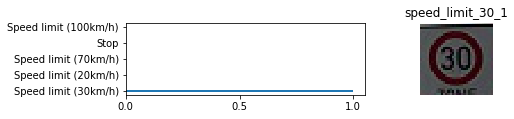

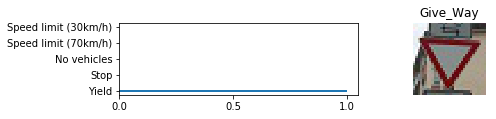

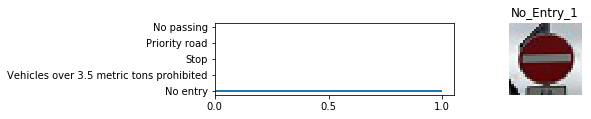

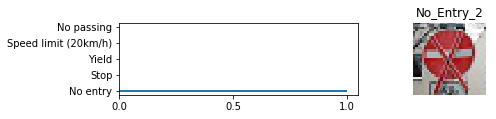

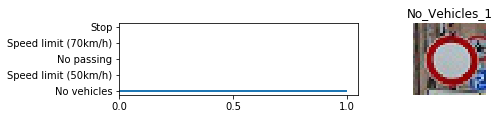

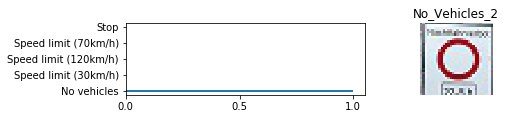

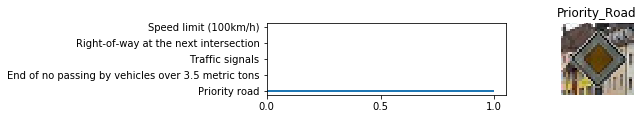

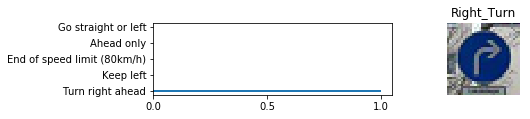

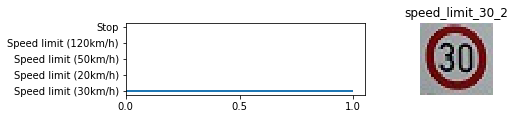

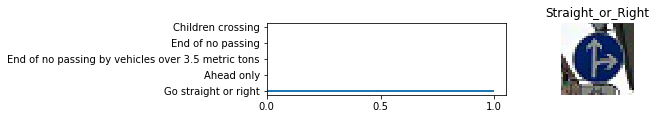

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#print("Predictions of the Signs:")
#print()
SignNames = pd.read_csv('D:\Desktop\CarND-Traffic-Sign-Classifier-Project\signnames.csv')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print()
    size = 10
    total_test_acc = 0
    
    
    for i in range(0, size):
        batch_x, batch_y = np.reshape(clahe_transform(new_images[i]),(1,32,32,3)), Y_new_signs[i]
        values, indices = sess.run(top_five, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        #print("Top 5 Predictions = {}".format(test_acc))
        
        fig, axies = plt.subplots(nrows=1, ncols=3)
        fig.tight_layout()
        
        axies[0] = plt.subplot2grid((3, 3), (0, 2))
        axies[1] = plt.subplot2grid((3, 3), (0, 0),colspan=2)
        
        axies[0].imshow(new_images[i])
        axies[0].set_title(temp[i][0]) 
        axies[0].set_axis_off()
        
        ind = np.arange(5)
        margin = 0.05
        width = 0.1
        bar_labels = [None]*5
        
        for j,val in enumerate(indices[0]):
            bar_labels[j] = SignNames.iloc[val][1]
        
        axies[1].barh(ind + margin, values[0], width)
        axies[1].set_yticks(ind + margin)
        axies[1].set_yticklabels(bar_labels)
        axies[1].set_xticks([0,0.5,1])
        
        fig.savefig('./Plots/Softmax_' + str(i) +'.jpg', bbox_inches='tight')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [26]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
#outputFeatureMap(clahe_transform(new_images[0]), conv1)